<a href="https://colab.research.google.com/github/EstiSari/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

Gamma Correction on Citra
-------------------------
input Gamma Value : 5


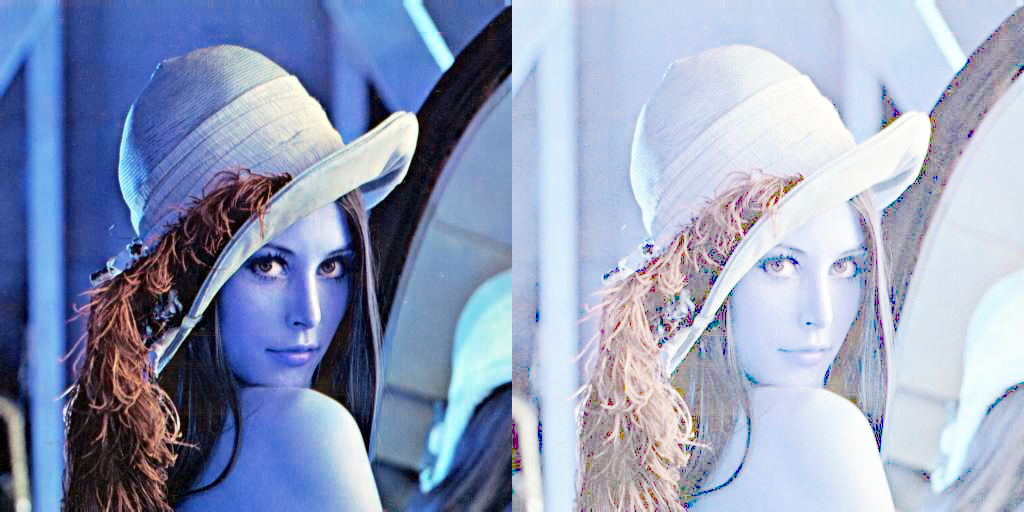

In [5]:
gambar = cv.imread('/content/drive/MyDrive/pvck/Gambar/Images/lena.jpg')
original = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)
gambar_gamma= np.zeros(original.shape, original.dtype)
print('Gamma Correction on Citra')
print('-------------------------')
try:
  gamma=int(input('input Gamma Value : ' ))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gambar_gamma[y,x,c] = np.clip(255 *pow(original[y,x,c]/255 , (1/gamma)),0,255);

final_frame = cv.hconcat((original, gambar_gamma))
cv2_imshow(final_frame)                                      

Gamma Correction on Citra
--------------------------
Input bit dept value: 5


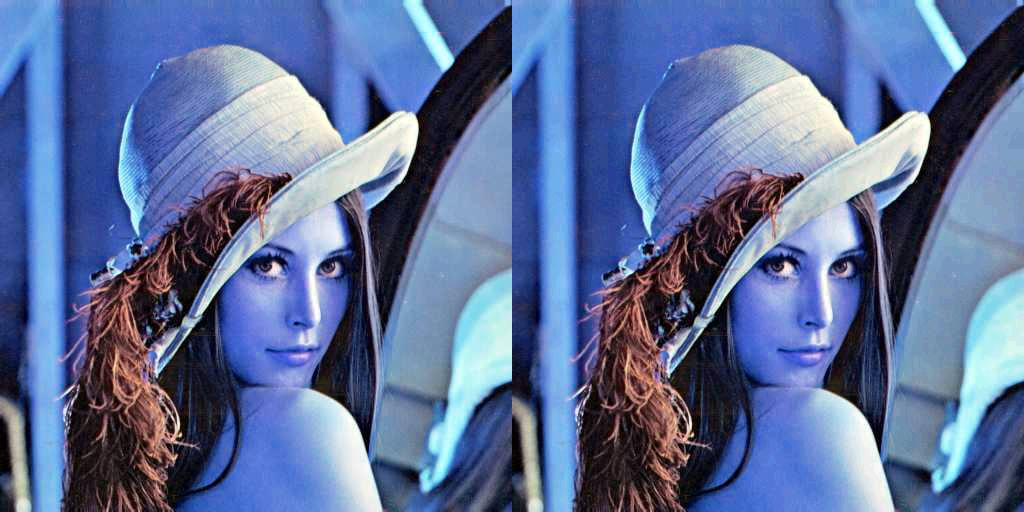

In [8]:
original = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)
gambar_gamma = np.zeros(original.shape, original.dtype)

print('Gamma Correction on Citra')
print('--------------------------')
try:
  bd=float(input('Input bit dept value: '))
except ValueError:
  print('Error, not a number')

bit=2**bd
level = 255/(bit/1)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gambar_gamma[y,x,c] = np.clip(round(original[y,x,c]/level)*level,0,255);

final_frame = cv.hconcat((original, gambar_gamma))
cv2_imshow(final_frame)

Value of PSNR is 27.537627404687022 (dB)


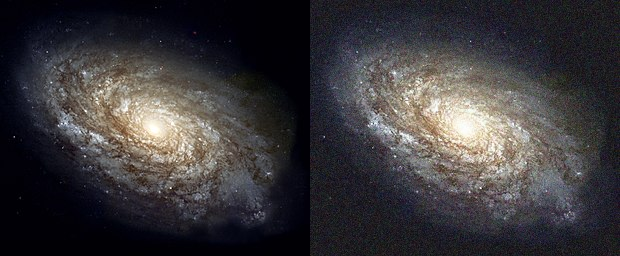

In [20]:
import glob
from math import log10, sqrt
  
original_image = cv.imread('/content/drive/MyDrive/pvck/Gambar/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pvck/Gambar/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) pict in folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original_image, compressed): 
    mse = np.mean((original_image - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.515792245766693 (dB)


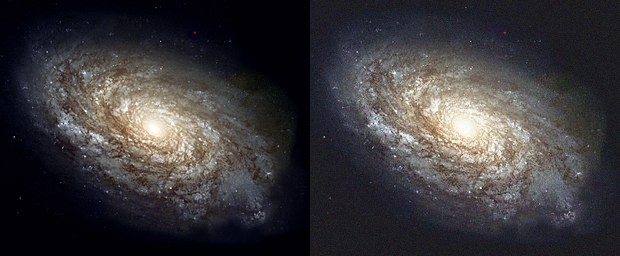

In [21]:
dst = cv_img[0]
noise_number = 29 #30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.502847426317317 (dB)


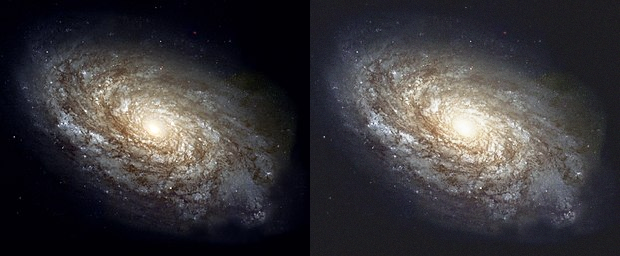

In [22]:
dst = cv_img[0]
noise_number = 59 #60
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

Value of PSNR is 27.510337125262932 (dB)


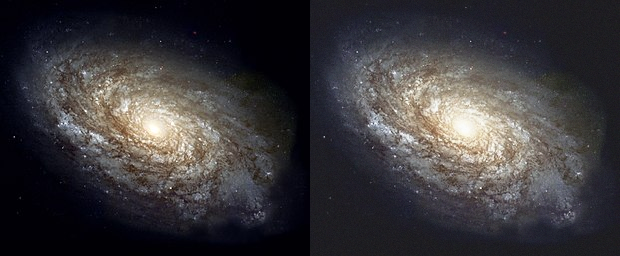

In [23]:
dst = cv_img[0]
noise_number = 79 #80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original_image, compressed)

print('Value of PSNR is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original_image, dst))
cv2_imshow(galaxy_frame)

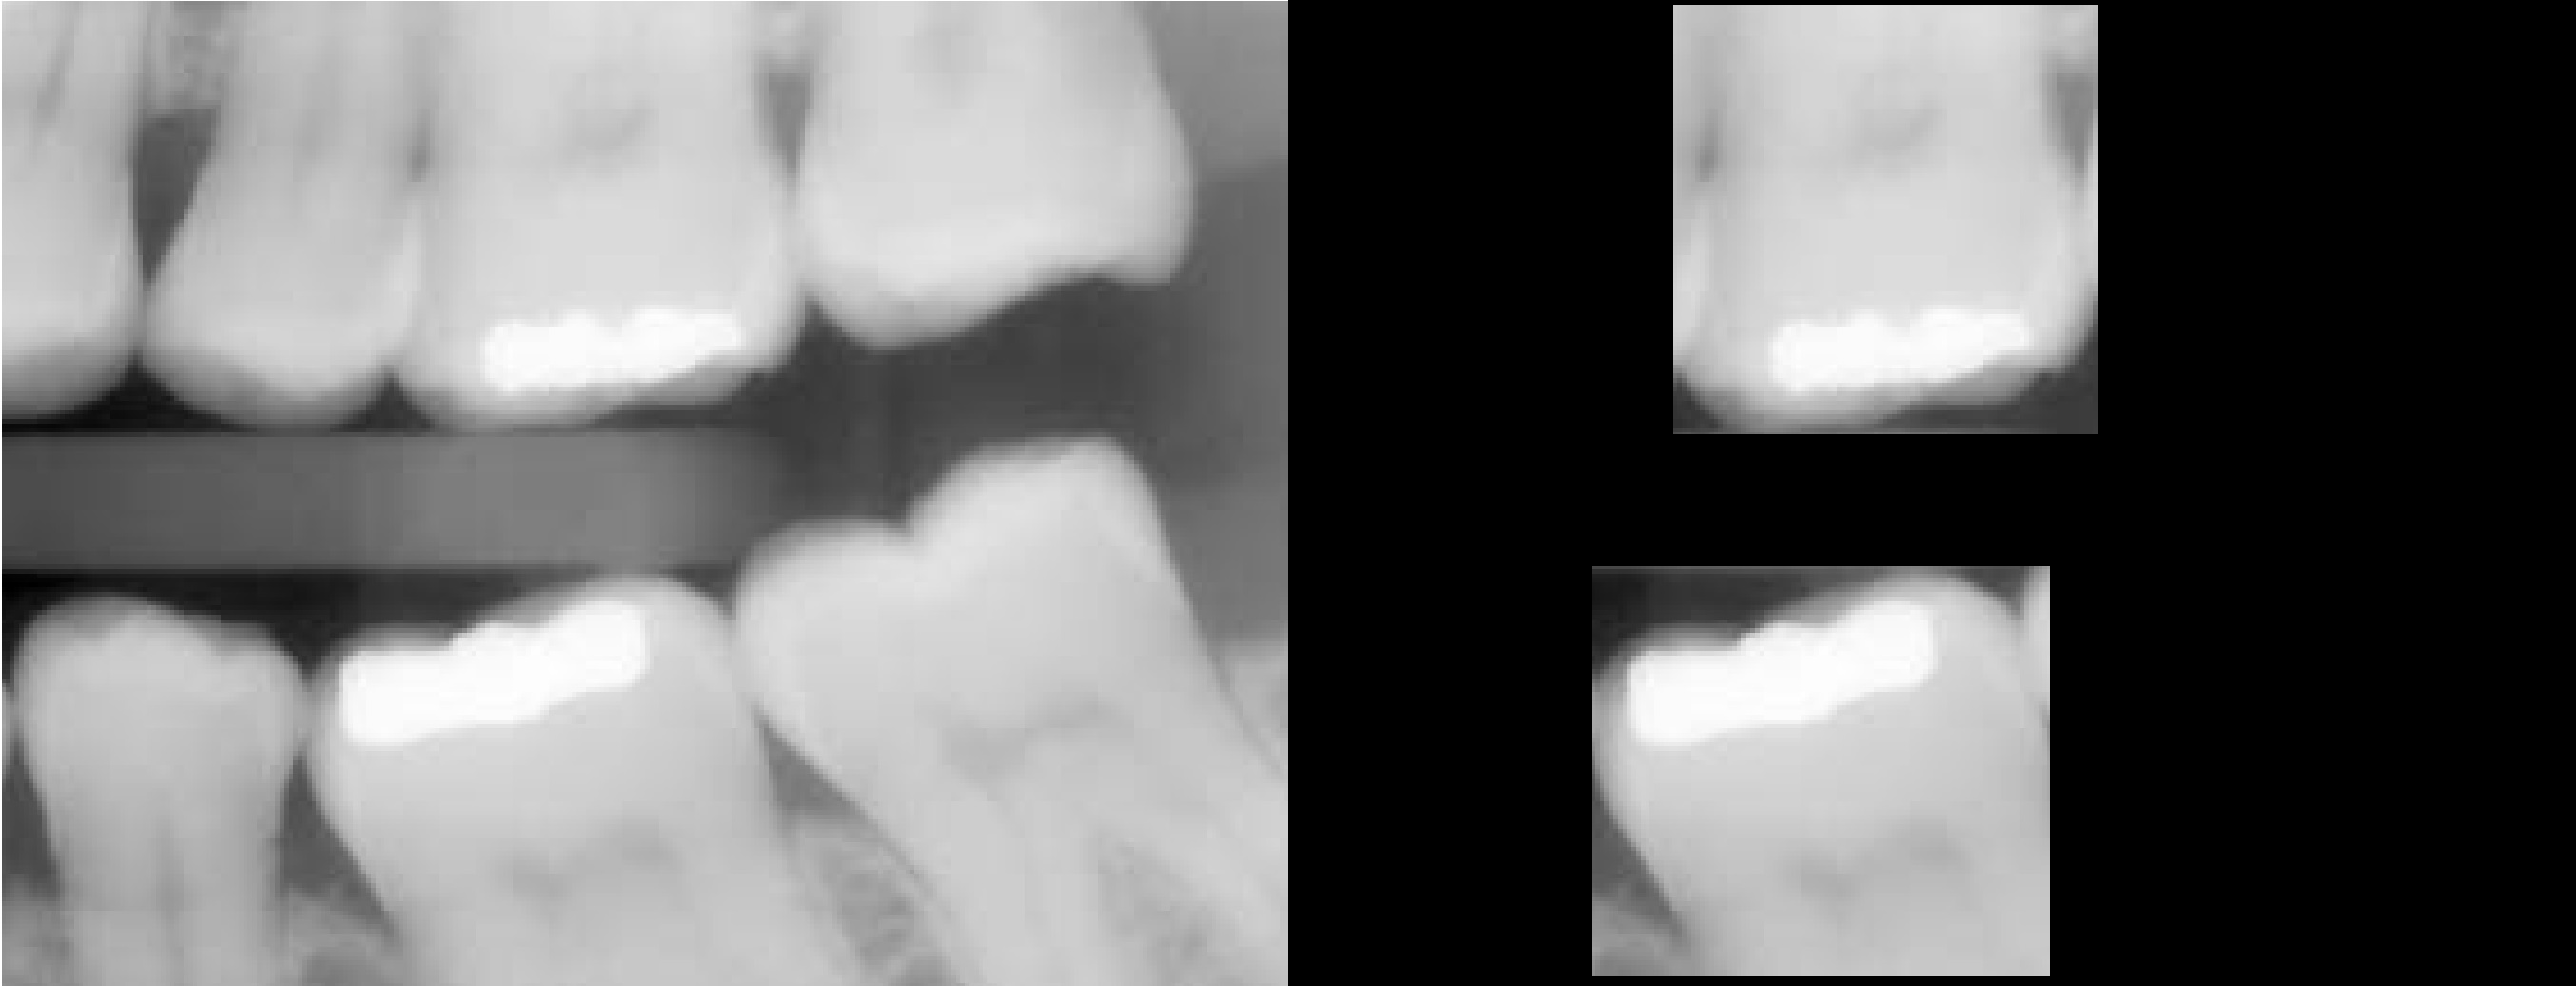

In [12]:
img=cv.imread('/content/drive/MyDrive/pvck/Gambar/Images/teeth.jpg')
mask=np.zeros(img.shape, dtype=np.uint8)
mask=cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)
result = img & mask

mask1 =cv.rectangle(mask,pt1=(405,5), pt2=(850,455),color=(255,255,255),thickness=-1)
result = img & mask1

final_frame=cv.hconcat((img,result))
cv2_imshow(final_frame)

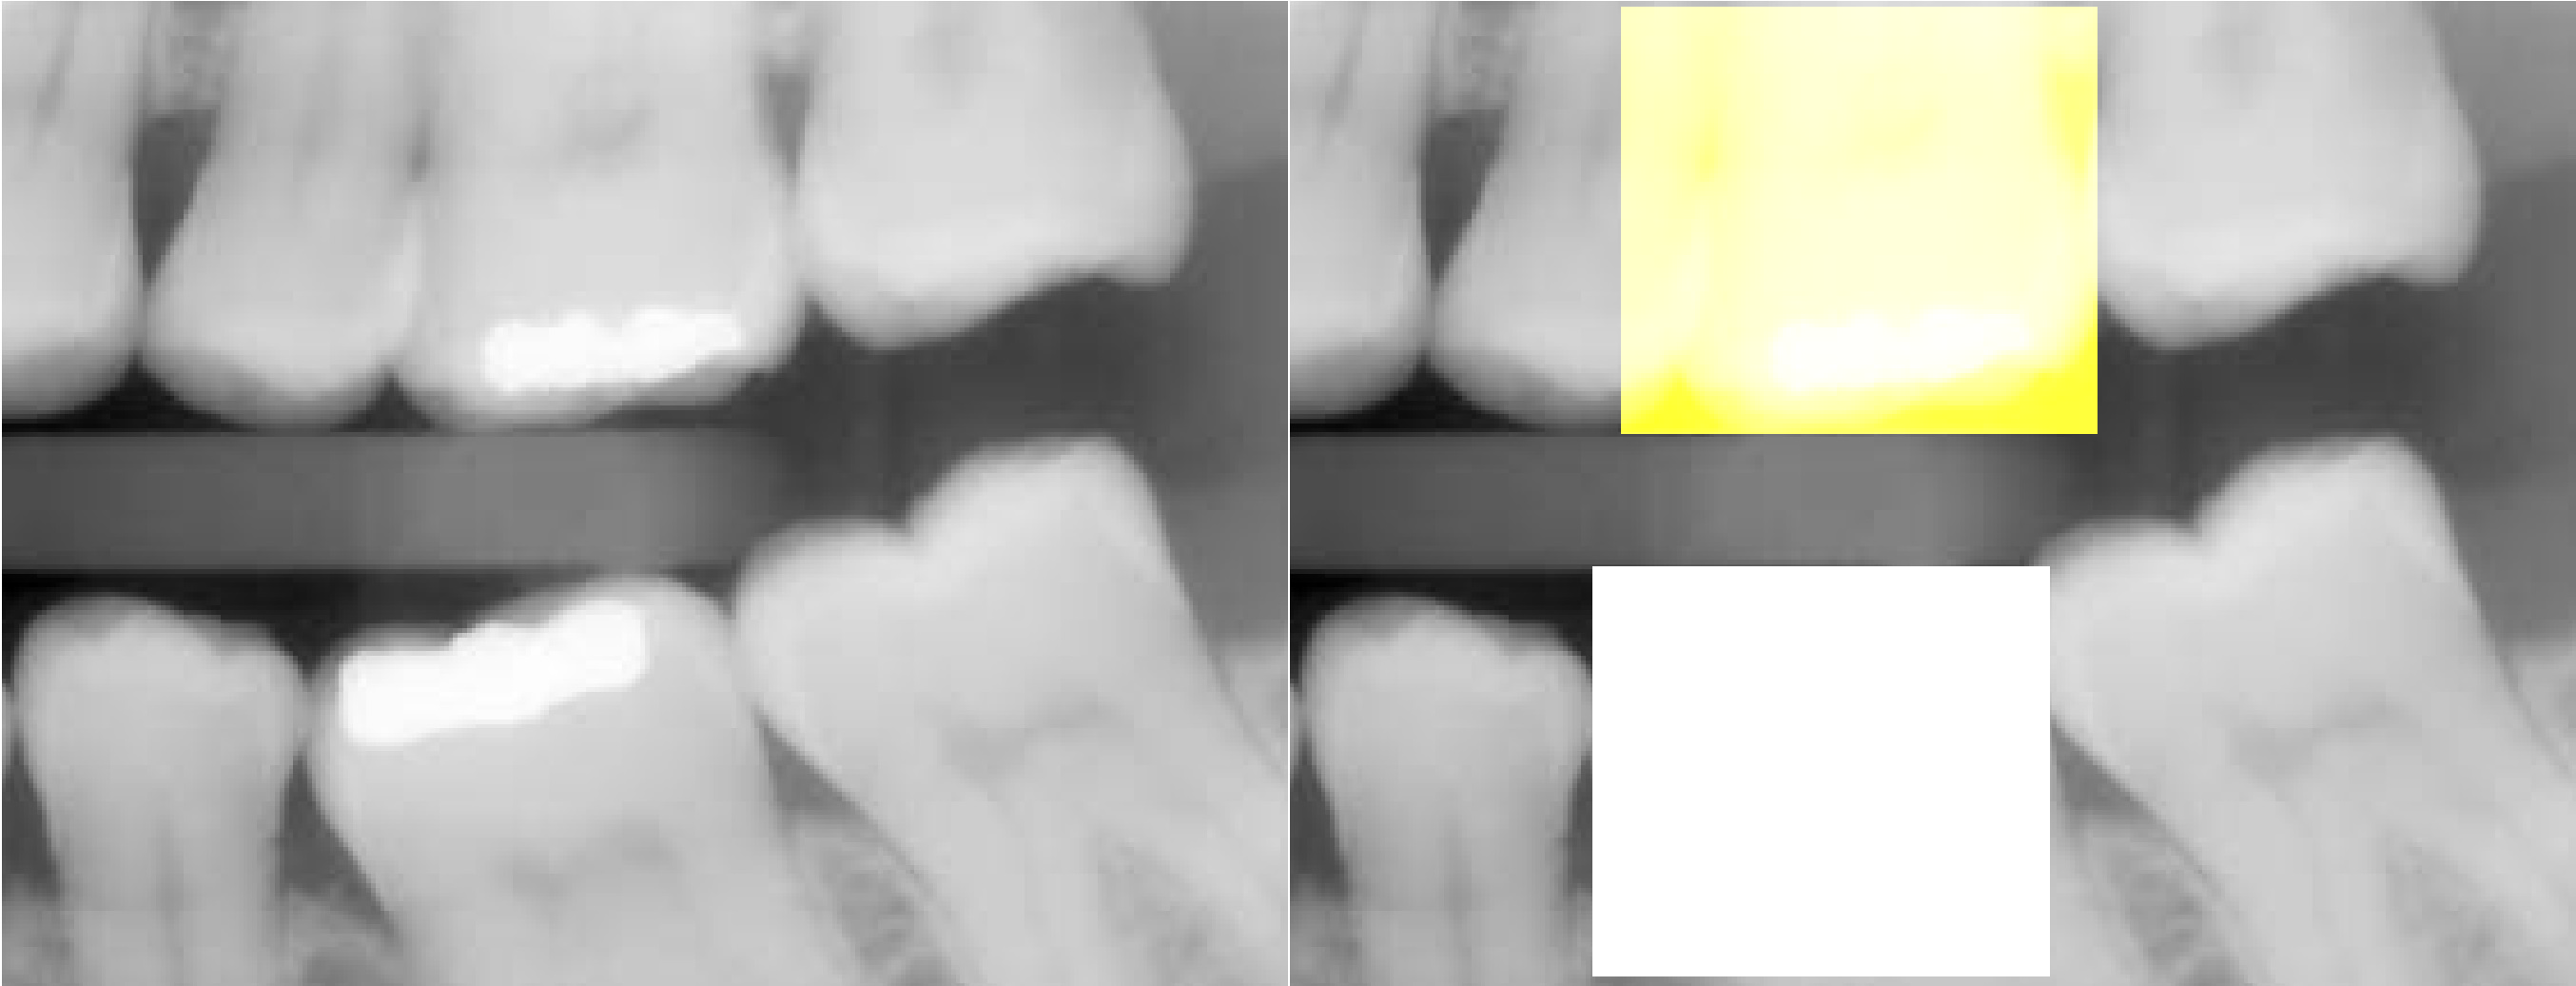

In [15]:
img_or=cv.imread('/content/drive/MyDrive/pvck/Gambar/Images/teeth.jpg')
mask_or = np.zeros(img_or.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img_or | mask_or
mask_or1 = cv.rectangle(mask_or,pt1=(350,7),pt2=(850,455),color=(0,255,255),thickness=-1)
result_or1 = img_or | mask_or1

final_frame = cv.hconcat((img_or, result_or1))
cv2_imshow(final_frame)

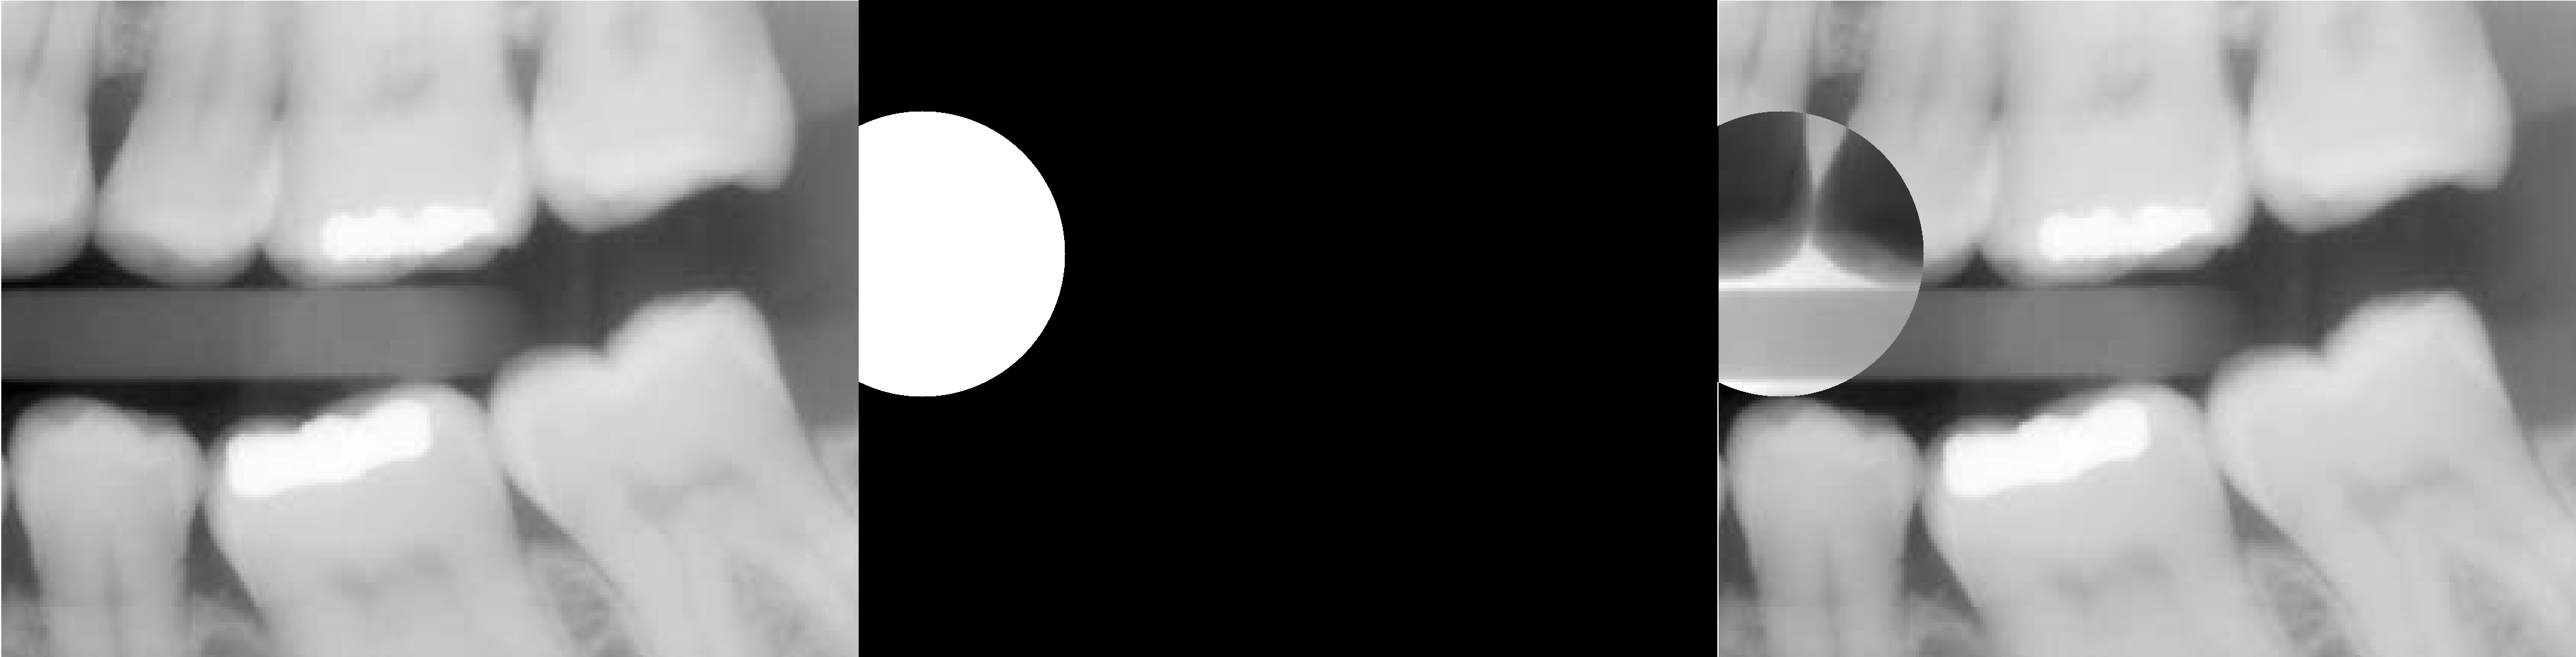

In [17]:
img_not=cv.imread('/content/drive/MyDrive/pvck/Gambar/Images/teeth.jpg')
mask_not = np.zeros(img_not.shape, dtype=np.uint8)
mask_not = cv.circle(mask_not, (100, 400), 225, (255,255,255), -1)

result_not = img_not ^ mask_not

final_frame = cv.hconcat((img_not, mask_not, result_not))
cv2_imshow(final_frame)

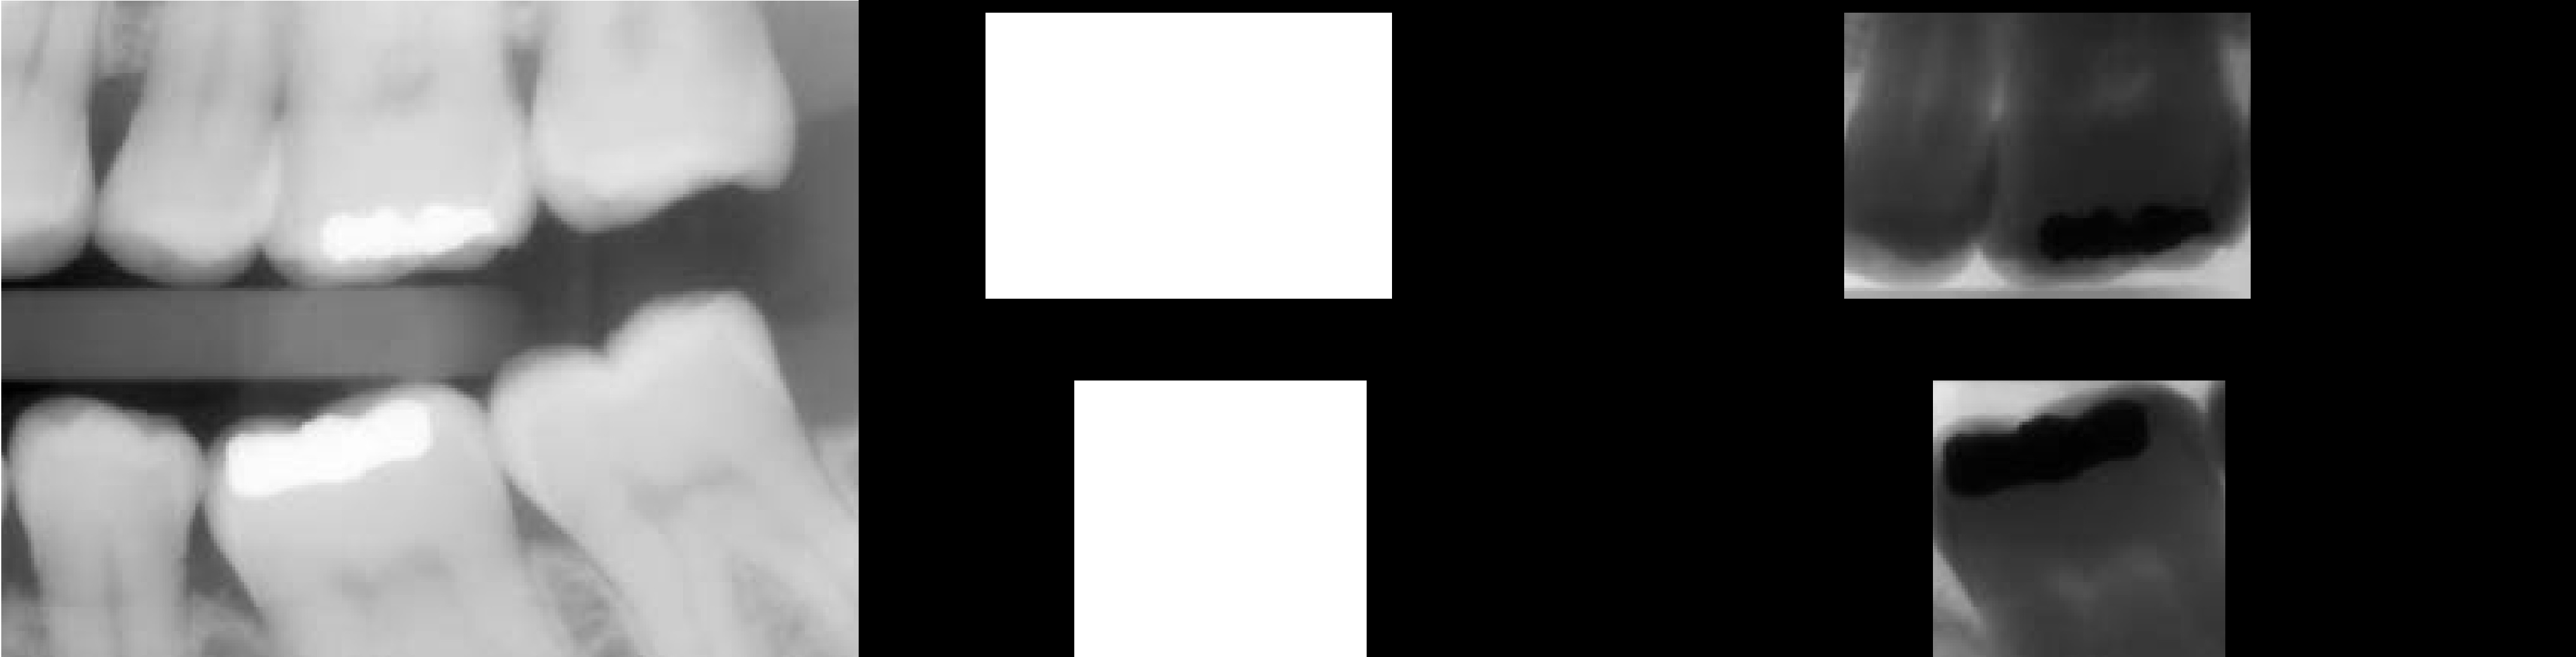

In [19]:
img_nand=cv.imread('/content/drive/MyDrive/pvck/Gambar/Images/teeth.jpg')
mask_nand = np.zeros(img_nand.shape, dtype=np.uint8)
mask_nand = cv.rectangle(mask_nand,pt1=(200,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask_nand = cv.rectangle(mask_nand,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)

result_nand = ~img_nand & mask_nand

final_frame = cv.hconcat((img_nand, mask_nand, result_nand))
cv2_imshow(final_frame)